In [1]:
# Telling IPython to render plots inside cells
%matplotlib inline

In [2]:
# Importing required Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

#Problem Statement 

Historical record of past three years shows that truck crash rates on 2-Lane roads in a (hypothetical city) of Zreeha is 0.5 crashes per million vehicle-kilometers with a standard deviation of 0.1. After the completion of compulsory refresher driving course for truck drivers, crash rates were recorded at 50 random sites of 2-Lane roads to estimate the current stats. Given the crash rate data in the following section, estimate whether the driving course made any difference in terms of the crash rates.

In [16]:
HTML('<img src="truck.jpg" width=600 height=400/>')

photo credit: <a href="http://www.flickr.com/photos/48124311@N04/5139338660">Two Dead After Multi-vehicle Collision</a> via <a href="http://photopin.com">photopin</a> <a href="https://creativecommons.org/licenses/by-sa/2.0/">(license)</a>

## Data Description

We have stored data in a data frame (df) which is sort of like a spreadsheet.

In [3]:
# The raw data values as an array or list
df = [0.3, 0.91, 0.69, 0.57, 0.28, 0.86, 0.68, 0.36, 0.83, 0.88, 
0.76, 0.85, 1.05, 0.7, 0.83, 0.76, 0.51, 0.6, 0.8, 0.71, 1.24, 
1.09, 0.23, 0.67, 0.97, 0.97, 0.37, 0.31, 0.76, 0.63, 0.91, 0.97, 
0.4, 0.59, 1.05, 0.57, 0.12, 0.69, 0.86, 0.7, 0.6, 0.69, 0.51, 
0.72, 1.27, 0.82, 0.43, 0.86, 0.32, 0.83]

# Transforming the list to data frame in Pandas
df = pd.DataFrame(df)

# First five observations
df.head()

,0
0,0.30
1,0.91
2,0.69
3,0.57
4,0.28


In [4]:
# Naming the single column as CR
df.columns = ['CR']
df.head()

,CR
0,0.30
1,0.91
2,0.69
3,0.57
4,0.28


Following shows the distribution of crash rates in the sample:

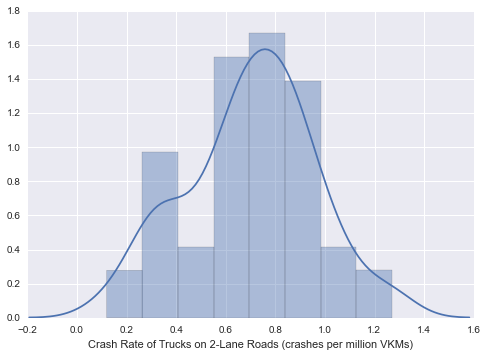

In [5]:
# Plotting the distribution of crash rates using seaborn library
sns.distplot(df['CR'], axlabel = "Crash Rate of Trucks on 2-Lane Roads (crashes per million VKMs)")

The distribution looks nearly normal.

From the given data we got following information:    
  
* Population mean, $\mu$ = 0.5   
* Population standard deviation, $\sigma$ = 0.1  
* Sample mean, $\bar{x}$  
 

In [6]:
xbar = df['CR'].mean()
print(xbar)


0.7016


* Sample standard deviation, $s$   

In [7]:
s = df['CR'].std()
print(s)

0.257961870304


* Number of observations, n = `r nrow(df)`

In [8]:
n = df['CR'].describe()[0]
n

50.0

#### Illustration of Critical values and p-value

In [19]:
HTML('<img src="HT1.png" width=750 height=500/>')

## Has the crash rate increased or decreased after driving course?

In [9]:
# Difference between sample mean and pop mean:
print(xbar - 0.5)

0.2016


Looking at the difference of between the sample mean and population mean one might argue that the higher sample mean implies an increase in crash rate by trucks on 2-Lane roads even after the training of drivers.  
But as we know that a sample mean is just a mean of a subset of population, it might not be a true representation of population mean. This might be caused due to sampling error (the difference in population and sample means due to chance).   
Therefore, we will formulate our null hypothesis as:  
  
The current population mean of the crash rate of truck drivers on 2-Lane road is 0.5 i.e.     
$H_o$: $\mu$ = 0.5  
and the alternative hypothesis would be:  
$H_A$: $\mu$ $\neq$ 0.5  

We will test this hypothesis at 95% confidence level. To understand the theory behind hypothesis testing, consider the figure above and assume that you take infinite random samples (size 50) of crashes on 2-Lane roads in the Zreeha city  and compute mean of each sample. Then you plot a histogram or density of these means. What you get now is the `Sampling Distribution of Sample Means'.  
According to the Central Limit Theorem (CLT) the mean of this distribution of sample means will always be equal to the mean of population distribution. Here we are hypothesizing that the mean of the current population is 0.5, similar to historical population of crash rates i.e. there is no difference in the crash rates of drivers even after new training and the observed difference of 0.2016 is simply due to chance.  

### Critical Z

At 5% significance level (we are tolerating only 5% chance that we reject a null hypothesis when it was infact true) the critical Z value can be computed as:   

In [10]:
prob = 1 - (0.05/2)
print(prob)

# Finding the critical z score using the norm.ppf function in stats library
Zcritical = stats.norm.ppf(prob)
print(Zcritical)

0.975
1.95996398454


Anything extreme from $\pm$ 1.96 is considered so extreme that probability of it occuring by chance is very low (less than 5%) and therefore the null hypothesis will be rejected.

### Test Statistic

To see where our sample mean falls we estimate the test statistic **Z**:

$$Z = {(\bar{x} - \mu)}/{(\sigma/\sqrt(n))}$$ 

In [11]:
Z = (xbar - 0.5) / (0.1 / (50**(1./2)))
print(Z)

14.2552727087


### Conclusion

As the test statistic of 14.25 is significantly higher than the critical value of +1.96 we reject the null hypothesis that mean crash rates of trucks on 2-Lane roads in Zreeha are same as its 3 year historical average. However, we are still unsure if the crash rates have increased or decreased. For ensuring that new results are worse we have to do a one-tail test on population mean i.e. $\mu$ > 0.5.    
Another way to reach the same conclusion is to compute the p-value. **p-value** is the probability of getting observed or extreme outcome given the null hypothesis is true. The p-value is also explained in the figure.  
If null hypothesis is true than the probability of getting the current data can be computed as:

In [12]:
# Finding the probabilities using the norm.cdf function in stats library
p029 = stats.norm.cdf(-Z)
p070 = 1-stats.norm.cdf(Z)
pval = p029 + p070
print(pval)

2.07837650173e-46


Because the p-value is significantly smaller than the level of significance of 0.05, we reject the null hypothesis.

## Resources

* [Learning Python for Data Analysis and Visualization](https://www.udemy.com/learning-python-for-data-analysis-and-visualization/)
* [Data Analysis and Statistical Inference course](https://www.coursera.org/course/statistics)
* Caldwell, Sally. Statistics unplugged. Cengage Learning, 2012.
* [Essential Basic Functionality of Pandas Library](http://pandas.pydata.org/pandas-docs/stable/basics.html)